<a href="https://colab.research.google.com/github/lathamithu/Techvolt-Intern/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RANDOM FOREST**

In [142]:
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [143]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
df.drop("Cabin", inplace = True, axis = 1)
df.drop('Ticket',inplace = True, axis=1)
df.drop('Name',inplace = True, axis=1)
df.dropna(inplace = True)

In [145]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [146]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [147]:
data = [df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    402
0    310
Name: not_alone, dtype: int64

In [148]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,male,22.0,1,0,7.2500,S,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,1
6,7,0,1,male,54.0,0,0,51.8625,S,0,1
7,8,0,3,male,2.0,3,1,21.0750,S,4,0
8,9,1,3,female,27.0,0,2,11.1333,S,2,0
9,10,1,2,female,14.0,1,0,30.0708,C,1,0
10,11,1,3,female,4.0,1,1,16.7000,S,2,0


In [149]:
df['Embarked'].describe()

count     712
unique      3
top         S
freq      554
Name: Embarked, dtype: object

In [150]:
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [151]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({"S": 0, "C": 1, "Q": 2})
df['Age'] = df['Age'].replace(0, np.NaN)
df.fillna(df.mean(),inplace=True)
df=df.set_index('PassengerId')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,1,0
2,1,1,1,38.0,1,0,71.2833,1,1,0
3,1,3,1,26.0,0,0,7.9250,0,0,1
4,1,1,1,35.0,1,0,53.1000,0,1,0
5,0,3,0,35.0,0,0,8.0500,0,0,1


In [152]:
x = df.drop("Survived", axis = 1)
y = df["Survived"]

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [154]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 3)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [155]:
y_pred = classifier.predict(x_test)

In [156]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

[[74  8]
 [20 41]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.84      0.67      0.75        61

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143

0.8041958041958042


In [157]:
from sklearn.feature_selection import SelectFromModel
feat_sel = SelectFromModel(classifier, threshold = 0.1)
feat_sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=3,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=20, n_jobs=None,
                                                 oob_score=False,
                                                 ran

In [158]:
X_imp_train = feat_sel.transform(x_train)
X_imp_test = feat_sel.transform(x_test)

In [159]:
clf_imp = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 7)
clf_imp.fit(X_imp_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [160]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8041958041958042

In [161]:
y_imp_pred = clf_imp.predict(X_imp_test)
accuracy_score(y_test, y_imp_pred)

0.7622377622377622

**DECISION TREE**

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [164]:
y_pred = clf.predict(x_test)

In [165]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix is :', cm, sep = '\n')


Confusion matrix is :
[[65 17]
 [14 47]]


In [166]:
cols = list(x.columns.values)

In [167]:
print('Accuracy (in %) :', accuracy_score(y_test, y_pred)*100)

Accuracy (in %) : 78.32167832167832


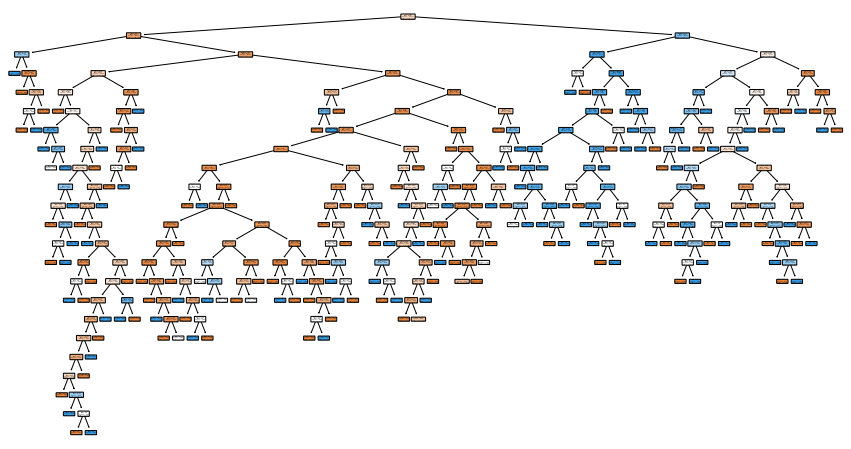

In [169]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
tree.plot_tree(clf.fit(x, y), feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True)
plt.show()

*PRUNING*

In [170]:
clf = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [173]:
y_pred = clf.predict(x_test)

In [174]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix is :', cm, sep = '\n')

Confusion matrix is :
[[75  7]
 [27 34]]


In [175]:

cols = list(x.columns.values)

In [176]:

print('Accuracy (in %) :', accuracy_score(y_test, y_pred)*100)

Accuracy (in %) : 76.22377622377621


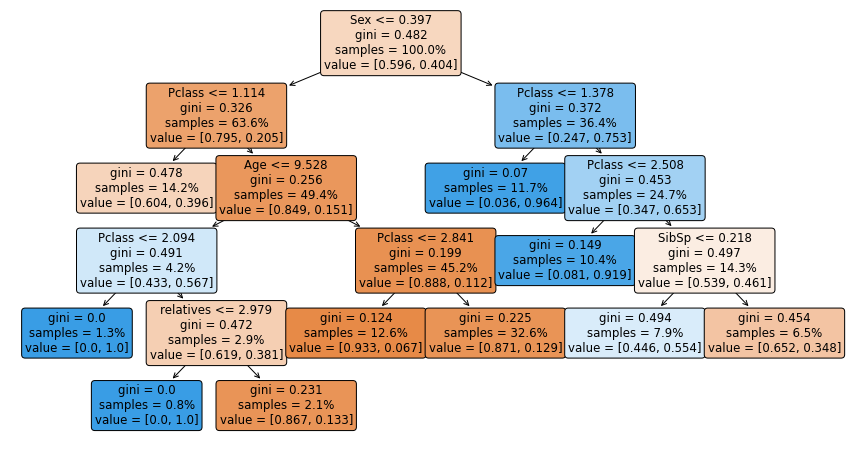

In [177]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
tree.plot_tree(clf.fit(x, y), feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True)
plt.show()